## Minimizer template

This notebook contains the basic syntax required to run a minimization

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
import time
# our own modules
from lace.emulator import gp_emulator
from lace.emulator import p1d_archive
from cup1d.data import data_MPGADGET
from cup1d.likelihood import lya_theory
from cup1d.likelihood import likelihood

### Set up mock data

Begin by picking a simulation to use as mock data, and creating a corresponding data object

In [2]:
# specify simulation to use to generate synthetic data
test_sim_label="central"
if type(test_sim_label)==int:
    drop_sim_number=test_sim_label
    print('will drop sim number {} from emulator'.format(drop_sim_number))
else:
    drop_sim_number=None

In [3]:
# specify simulation suite and P1D mesurements
basedir="/lace/emulator/sim_suites/Australia20/"
z_max=4.5
emu_type="polyfit"
data=data_MPGADGET.P1D_MPGADGET(basedir=basedir,sim_label=test_sim_label,
                                zmax=z_max,polyfit=(emu_type=="polyfit"))

### Emulator and training set

Create a set of training data to train an emulator

In [4]:
# specify simulation suite and P1D mesurements
basedir="/lace/emulator/sim_suites/Australia20/"
z_max=4.5
archive=p1d_archive.archiveP1D(basedir=basedir,drop_sim_number=drop_sim_number,z_max=z_max,
                            drop_tau_rescalings=True,drop_temp_rescalings=True)

In [6]:
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
emu_type="polyfit"
kmax_Mpc=8
emu=gp_emulator.GPEmulator(basedir,z_max=z_max,
                                verbose=False,paramList=paramList,train=True,
                                asymmetric_kernel=True,rbf_only=True,
                                emu_type=emu_type,passarchive=archive,
                                kmax_Mpc=kmax_Mpc)

 /global/homes/f/font/.conda/envs/cup1d/lib/python3.9/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


Training GP on 330 points
GPs optimised in 10.32 seconds


### Set up a likelihood

Here we chose which parameters we want to sample, over which range and chose a prior. We pass the data and emulator objects to the likelihood.

In [7]:
free_param_names=["As","ns","ln_tau_0"]
#free_param_names=["As","ns","ln_tau_0","ln_tau_1","ln_sigT_kms_0","ln_sigT_kms_1","ln_gamma_0","ln_gamma_1"]
prior=0.5

In [8]:
like=likelihood.Likelihood(data=data,emulator=emu,
                            free_param_names=free_param_names,
                            prior_Gauss_rms=None)

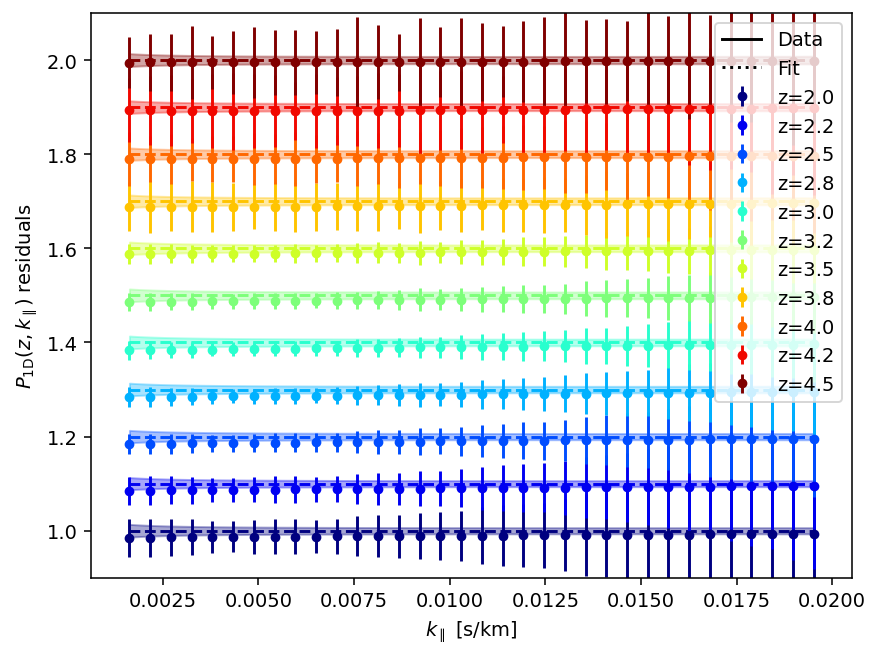

In [9]:
like.plot_p1d(residuals=True)

# Try iminuit minimizer

In [10]:
minimizer = iminuit_minimizer.IminuitMinimizer(like)

NameError: name 'iminuit_minimizer' is not defined

In [ ]:
minimizer.minimize(compute_hesse=True)

In [ ]:
plt.figure()
minimizer.plot_best_fit()
plt.savefig('best_fit_Nyx.pdf')

In [ ]:
minimizer.plot_ellipses('As','ns')
plt.savefig('contours_Nyx.pdf')

### Access the actual minimizer object from iminuit

In [11]:
minimizer.minimizer.migrad()

NameError: name 'minimizer' is not defined

In [12]:
minimizer.minimizer.draw_mncontour("x0", "x1")

NameError: name 'minimizer' is not defined

(array([0.43093077, 0.43308894, 0.4352471 , 0.43740527, 0.43956344,
        0.4417216 , 0.44387977, 0.44603793, 0.4481961 , 0.45035427,
        0.45251243, 0.4546706 , 0.45682876, 0.45898693, 0.4611451 ,
        0.46330326, 0.46546143, 0.46761959, 0.46977776, 0.47193593,
        0.47409409, 0.47625226, 0.47841042, 0.48056859, 0.48272676,
        0.48488492, 0.48704309, 0.48920125, 0.49135942, 0.49351759]),
 array([-180.28204131, -180.54557563, -180.79040987, -181.01653119,
        -181.2239249 , -181.41257478, -181.58246319, -181.73357112,
        -181.86587812, -181.97930041, -182.07398114, -182.14975897,
        -182.2066348 , -182.2445175 , -182.26356412, -182.26356195,
        -182.2444731 , -182.20645405, -182.1492678 , -182.07292734,
        -181.97736581, -181.86272268, -181.72871307, -181.57537118,
        -181.40263973, -181.2104569 , -180.99875551, -180.76746212,
        -180.51657987, -180.2459252 ]))

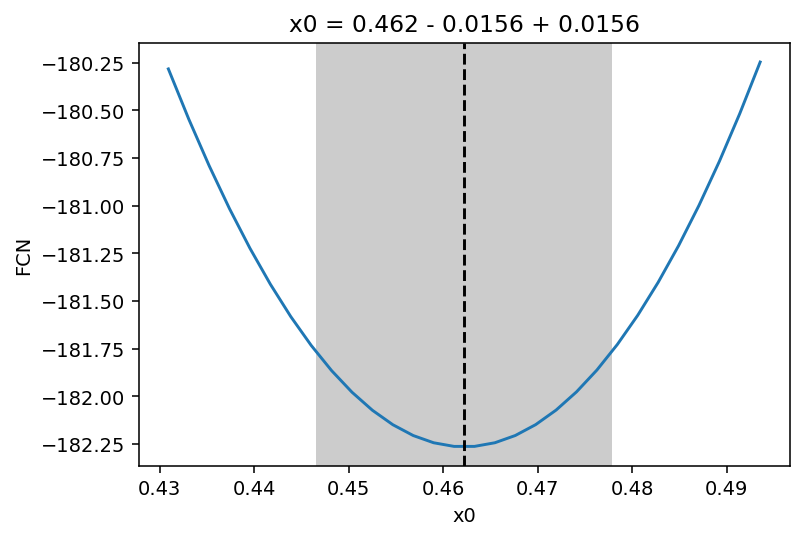

In [16]:
minimizer.minimizer.draw_mnprofile("x0")